## Módulo II: Preprocesamiento

### Estandarización de información 

#### Método de máximos y Zscores


##### Actividad 1 
* Genere un modelo con la data normal y otro con la data estandarizada por máximos.
* Analice los cambios en performance con ambos modelos.
* Analice las distribuciones antes y después de estandarizar. 
* Compare coeficientes antes y después. 

##### Actividad 2 

* Separe los sets en entrenamiento y prueba. 
* Genere un modelo con la data normal y otro con la data estandarizada por zscores. 
* Compare coeficientes antes y después y responda: 
    * ¿Por qué los coeficientes son diferentes? 
* Responda: 
    * En términos generales (es decir, no específicamente en este set), ¿usaría estandarización por máximos o estandarización por zscores? 


### Estandarización por máximos

Pensemos en un modelo de la siguiente forma:

$$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n$$

En un modelo como el anterior, nosotros queremos encontrar los coeficientes $\beta_i$ tal que nos ayuden a encontrar la mejor estimación $\hat{y}$. Las $X$ son nuestros features, nuestras variables.

Pensemos que nuestras variables se encuentran entre 0 y 10, pero que alguna en especial (pensemos en las de inversión) se encuentran en el orden de los millones. Indudablemente esto afectará a las decisiones que haga nuestro modelo anterior.


**La estandarización por máximos** consiste en aplicar una división de todos los datos por el máximo de cada feature, de tal manera que los outliers se "suavizarán".

$$ X_2 = \frac{X}{\max{X}} $$ 

De esta manera, podremos evitar problemas de ese estilo en modelos como el propuesto.

In [71]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from copy import deepcopy
from scipy.stats import norm
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split


plt.style.use('ggplot')
%matplotlib inline



In [72]:
df = pd.read_csv('standarization_ii.csv')


Tenemos distintos atributos en nuestro set, cada uno de ellos independientes entre sí y que estimarán la variable `siguiente_salario` de la siguiente forma: 

$$\hat{y} = \hat{\text{siguiente_salario}} = \beta_0 + \beta_1\times \text{edad} + \beta_2 \times \text{salario_anterior} + \dots + \beta_n \times \text{primer_salario}$$

Cabe mencionar que en este dataset los datos son independientes entre sí tanto por filas como por columnas. Lo anterior significa que no hay usuarios repetidos ni componentes temporales. 

De entrada los datos parecen ser muy diferentes entre sí, a manera de EDA sencillo comparemos sus medias. 

<Axes: >

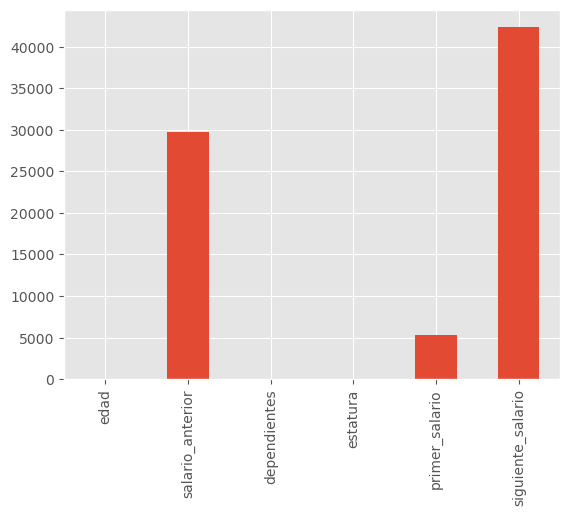

In [73]:
df.mean().plot(kind='bar')

Se observa sin duda una diferencia importante de magnitudes. Antes de aplicar la estandarización por máximos, separemos sets que nos servirán para generar un modelo y para evaluarlo. 

In [74]:
response = 'siguiente_salario'

predictors = list(set(df.columns).difference([response]))
predictors

['dependientes', 'primer_salario', 'estatura', 'edad', 'salario_anterior']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=.2, random_state=7)

Generación de modelo:

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
coefs_first_model = model.coef_
coefs_first_model

array([ 7.04116740e+03,  3.16974275e+00, -5.47361309e+02,  1.90014169e+02,
        7.68257347e-01])

Prediciendo

In [78]:
prediction = model.predict(x_test)

Text(0, 0.5, 'Predicted')

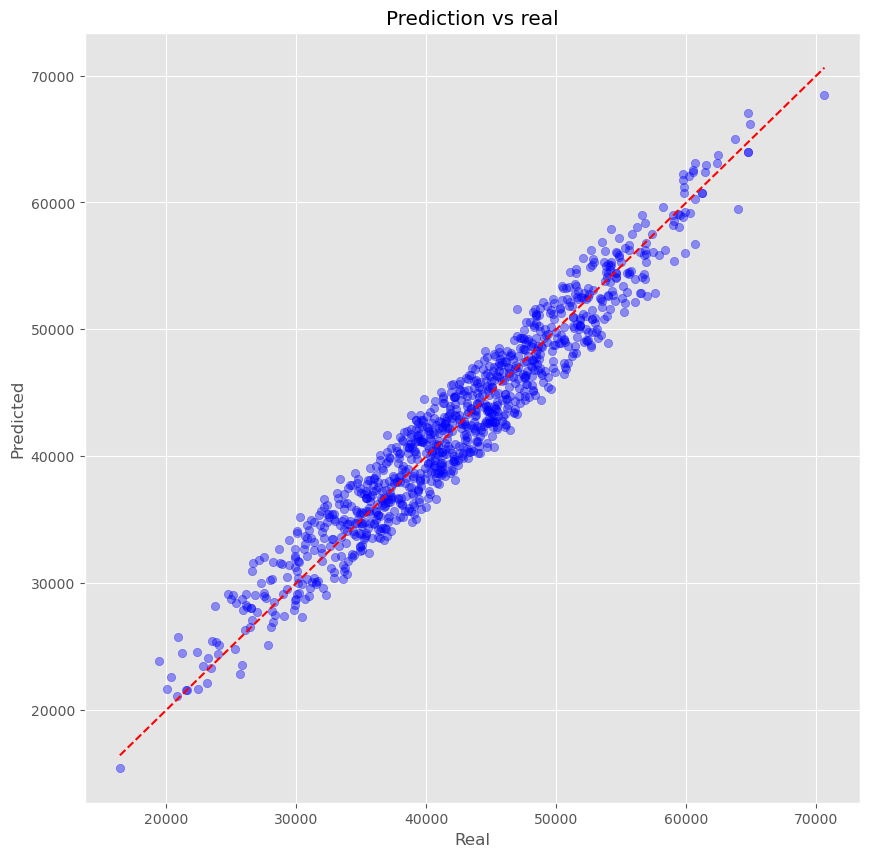

In [79]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(y_test, prediction, color='blue', alpha=0.4)

lista_auxiliar = [min(y_test), max(y_test)]

ax.plot(lista_auxiliar, lista_auxiliar, linestyle='--', color='red')

ax.set_title('Prediction vs real')
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')

In [80]:
error1 = np.mean(abs(y_test - prediction))

In [81]:
print(f'El error en el primer set es de: {error1} MXN')

El error en el primer set es de: 1827.5079587859777 MXN


Hecho esto, repitamos el proceso pero estandarizando.

In [82]:
norm_x_train = x_train / x_train.max()
norm_x_test = x_test / x_train.max()

In [83]:
model = LinearRegression()
model.fit(norm_x_train, y_train)

prediction = model.predict(norm_x_test)

coefs_second_model = model.coef_
coefs_second_model

array([35205.83700562, 31697.42750147, -1012.61842074, 12350.92099467,
       38412.86735821])

In [84]:
error2 = np.mean(abs(y_test - prediction))

In [85]:
print(f'El error en el primer set es de: {error2} MXN')

El error en el primer set es de: 1827.5079587859814 MXN


In [86]:
error1, error2

(1827.5079587859777, 1827.5079587859814)

Observamos que los errores son muy similares, ¿por qué? 

Antes de responder eso veamos los coeficientes de ambos modelos. 

C:\Users\hecto\AppData\Local\Temp\ipykernel_12768\2607464902.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


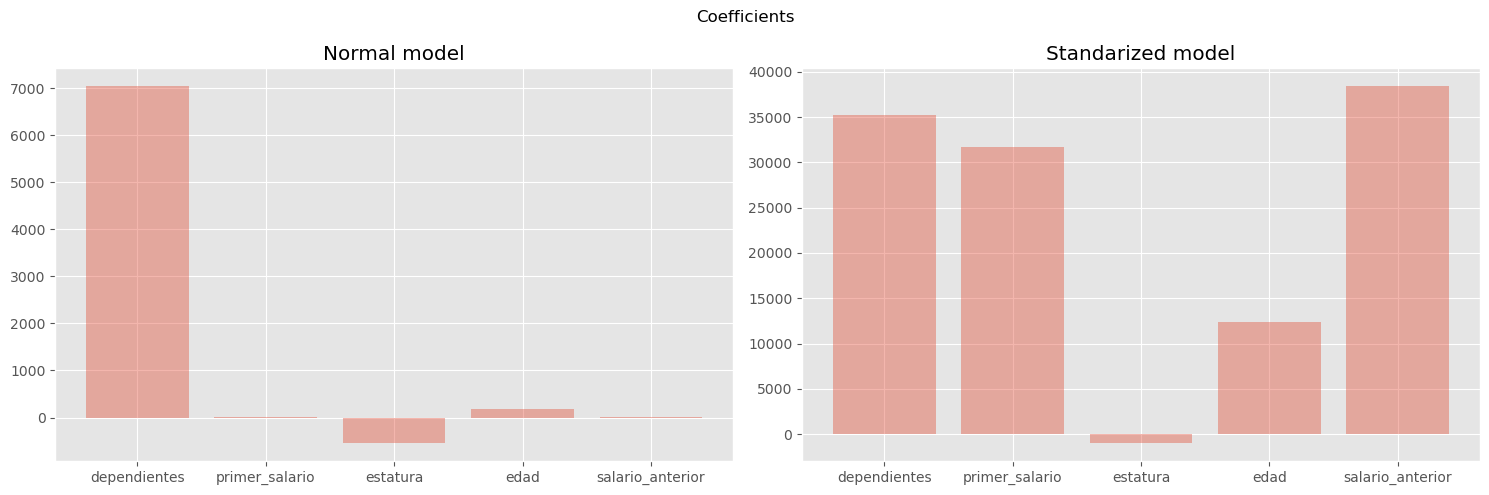

In [87]:
index = range(len(coefs_first_model))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.bar(index, coefs_first_model, alpha=.4)
ax2.bar(index, coefs_second_model, alpha=.4)

ax1.set_title('Normal model')
ax2.set_title('Standarized model')

fig.suptitle('Coefficients')

ax1.set_xticks(index)
ax2.set_xticks(index)

ax1.set_xticklabels(predictors)
ax2.set_xticklabels(predictors)

fig.show()
fig.tight_layout()

Los coeficientes son muy diferentes entre sí. 

El performance en este caso no se ve significativamente afectado, pero la **interpretación** sí. 

Esto se da por las diferencias tan grandes que existen entre las distribuciones. 

Observemos como el primer modelo le da importancia a `estatura`, cosa que ya no ocurre con el segundo modelo. Ocurre un efecto inverso con `primer_salario`.

¿Qué pasa con las distribuciones? 

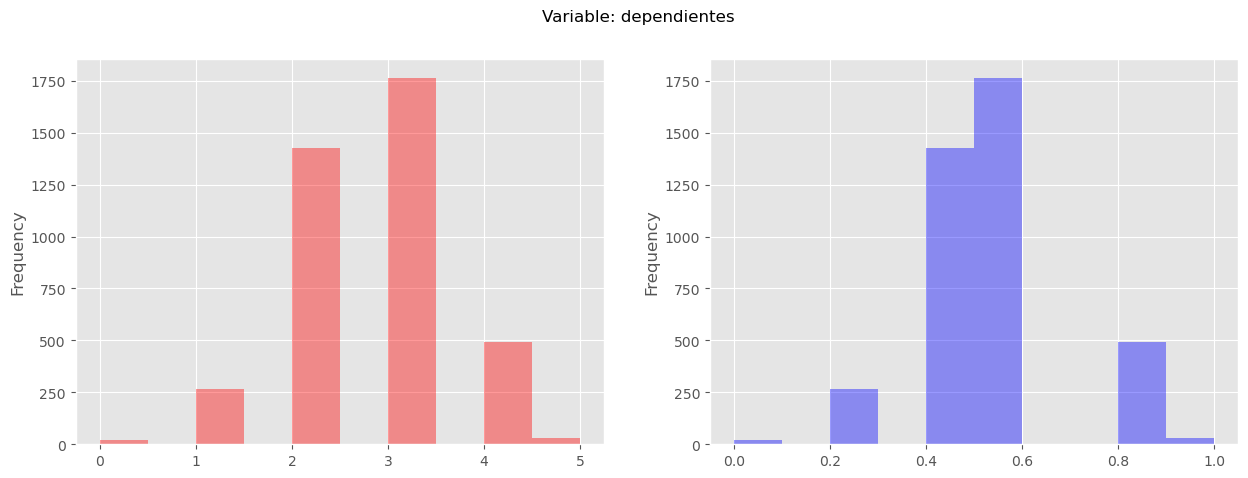

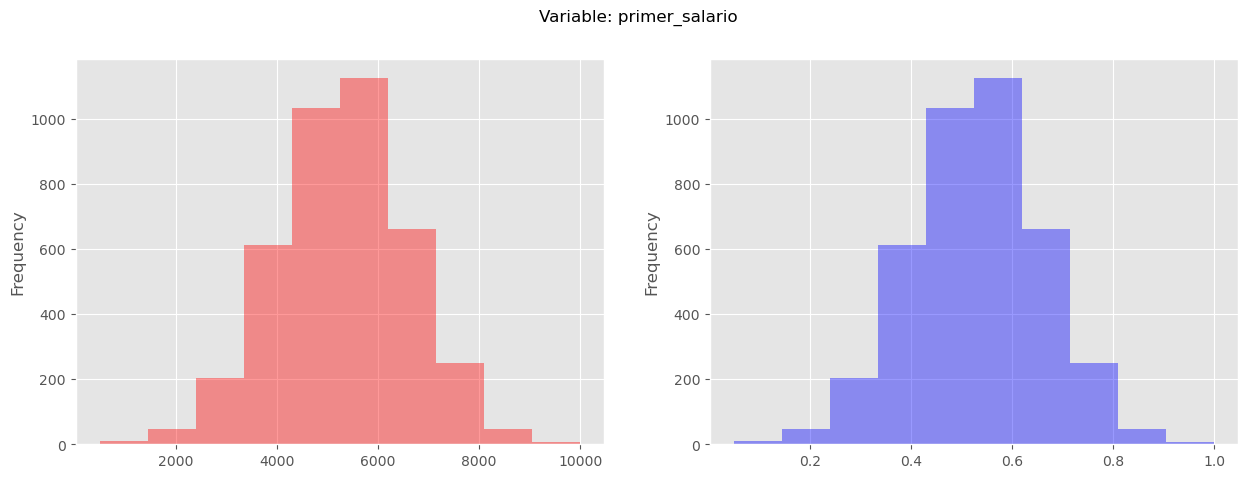

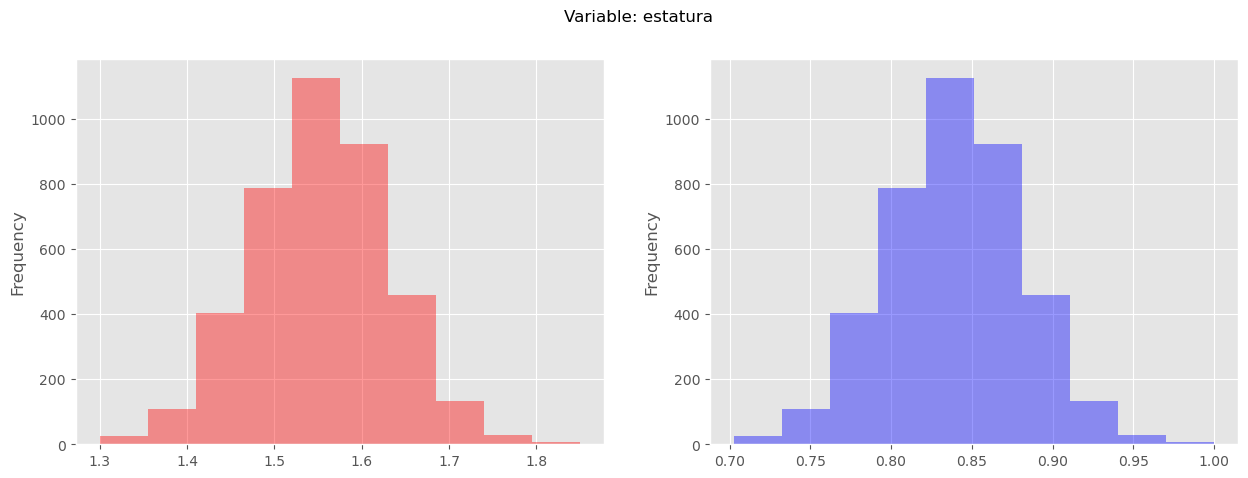

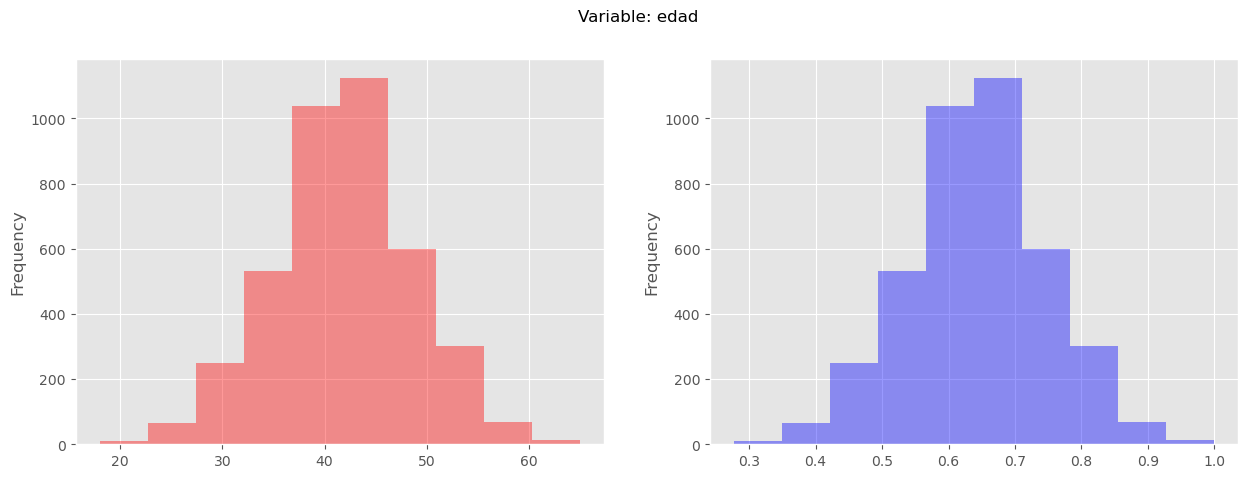

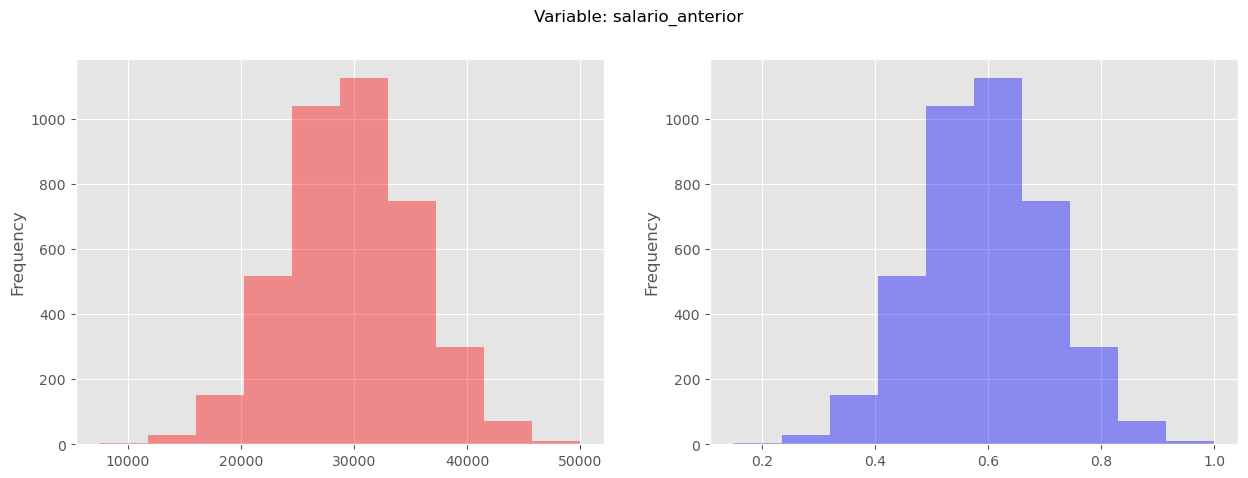

In [88]:
for predictor in predictors:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    x_train[predictor].plot(kind='hist', color='red', alpha=.4, ax=ax1)
    norm_x_train[predictor].plot(kind='hist', color='blue', alpha=.4, ax=ax2)

    fig.suptitle(f'Variable: {predictor}')

Las distribuciones **no cambian**. Lo que cambia son los valores. 


Es de **vital importancia NO AFECTAR** las distribuciones. 

### Zscores: Estandarización a la media

La estandarización a la media (también conocida como score $Z$) es un método que nos dice en cuántas desviaciones estándar respecto a la media se encuentra nuestro dato. 

El score $Z$ se define por: 

\begin{equation}
    Z = \frac{X - \mu}{\sigma}
\end{equation}

Podemos encontrar el área acumulada a la izquierda de un $Z$ en la siguiente liga: https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

Un score $Z$ nos va a dar una idea de la ubicación de un dato respecto a la población (similar a los percentiles). 

In [89]:
# Generemos una serie de aleatorios con media en 5 y desviación de 10. 


# Coloquemos desviaciones, desde -3 hasta 3.


# Calculemos el promedio más N veces las desviaciones.



In [90]:
# Grafiquemos


# Primero un histograma azul de nuestros datos.


# Pongamos líneas verticales en la desviación estándar.

# Calculemos ahora nuestros Z scores z = (x - mu) / sigma


# Grafiquemos nuestros z scores


Hasta aquí:

* La distribución es la misma, ¿por qué? 
    * <font color='green'>Porque todos los datos son convertidos bajo los mismos parámetros, usan el mismo promedio y la misma desviación (cada columna con sus propios estadísticos).</font> 
* Los outliers siguen ahí, ¿por qué si estamos considerando la desviación para el cálculo? 
    * <font color='green'>Porque estamos haciendo un reescalamiento, no una identificación ni una eliminación de datos.</font> 
* ¿Esto puede servir para hacer una detección de outliers?
    * <font color='green'>Sí, siempre y cuando se determine un límite de un $z$ que comience a identificar outliers (algo así como un criterio de desviaciones).</font> 
    
¿Cómo relacionamos esto con el orden de nuestros datos?

In [91]:
# Primero obtengamos el percentil 90.


# Sacamos un dato que está arriba del percentil 90.


# Veamos cuál es el valor de ese dato.


# Veamos ahora cuál es el Zvalue de ese dato.


Son muy diferentes los datos normales a los estandarizados, volvamos a nuestro histograma para ver dónde se ubicarían.

In [92]:
# Gráfica


# Datos normales


# Graficando las líneas de desviación

# Graficando z scores

# Agregando el valor observado normal

# Agregando el valor observado normalizado




##### ¿Para qué usar una estandarización Z? 
* Requerimiento de modelos
    * Nnets.
    * SVM.
    * Regresiones.
    * Procesos de optimización que se vean afectados por coeficientes.
    * Algoritmos que usen distancias (euclideana).
* Nuestra data no es comparable entre si.
    * Altura de un edificio.
    * Edades de personas.
    * Salarios.
    
##### ¿Por qué no una normalización min/max?
* Uso de distribuciones normales y/o data centrada en su media.
* Interpretación directa.
    * Dispersión.
    * Casos atípicos.

### Tomemos nuestros datos anteriores y:
Seleccionemos una variable específica.

In [93]:
variable = 'primer_salario'

df = pd.read_csv('standarization_ii.csv', index_col=0).dropna()



Estandaricemos usando lo ya aprendido.

Ahora obtengamos los percentiles.

Transformemos nuestro diccionario. 

Buscamos un diccionario con la forma `{Percentil: Valor en nuestros datos}`

Relacionamos el percentil con el valor Z. Buscamos obtener el valor del Z en cada punto de nuestros percentiles.

In [94]:
# Transformando escala de los percentiles


Grafiquemos

Se observa que la probabilidad acumulada tiene una relación cercana a lo obtenido con Zscores.

### Disclaimer importante:


En esta sesión no estamos cuidando el tema del leakage temporal, éste deberá ser tomado en cuenta si los datos lo requieren (no fue el caso). 

**Las estandarizaciones se deben hacer con los datos de entrenamiento.**